In [1]:
###importing the required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
train_df.shape

(28200, 22)

In [5]:
#checking for null values
train_df.isnull().any()

tracking_id                       False
datetime                          False
wind_speed(m/s)                    True
atmospheric_temperature(°C)        True
shaft_temperature(°C)              True
blades_angle(°)                    True
gearbox_temperature(°C)            True
engine_temperature(°C)             True
motor_torque(N-m)                  True
generator_temperature(°C)          True
atmospheric_pressure(Pascal)       True
area_temperature(°C)              False
windmill_body_temperature(°C)      True
wind_direction(°)                  True
resistance(ohm)                    True
rotor_torque(N-m)                  True
turbine_status                     True
cloud_level                        True
blade_length(m)                    True
blade_breadth(m)                  False
windmill_height(m)                 True
windmill_generated_power(kW/h)     True
dtype: bool

In [6]:
train_df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [7]:
##checking the data types of the csv file
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [8]:
train_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [9]:
train_df["turbine_status"].value_counts()

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64

In [10]:
train_df["cloud_level"].value_counts()

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64

In [11]:
train_df["datetime"].value_counts()

2018-12-11 23:33:20    1
2019-09-08 09:13:20    1
2019-03-27 22:23:20    1
2019-06-02 05:33:20    1
2019-08-25 23:43:20    1
                      ..
2019-07-23 01:33:20    1
2019-02-16 02:13:20    1
2019-02-15 08:23:20    1
2019-04-03 16:33:20    1
2019-02-08 01:03:20    1
Name: datetime, Length: 28200, dtype: int64

In [12]:
##filling the null values

##filling numerical data
train_df["wind_speed(m/s)"]=train_df["wind_speed(m/s)"].fillna(train_df["wind_speed(m/s)"].mean())
train_df["atmospheric_temperature(°C)"]=train_df["atmospheric_temperature(°C)"].fillna(train_df["atmospheric_temperature(°C)"].mean()) 
train_df["shaft_temperature(°C)"]=train_df["shaft_temperature(°C)"].fillna(train_df["shaft_temperature(°C)"].mean())
train_df["blades_angle(°)"]=train_df["blades_angle(°)"].fillna(train_df["blades_angle(°)"].mean())
train_df["gearbox_temperature(°C)"]=train_df["gearbox_temperature(°C)"].fillna(train_df["gearbox_temperature(°C)"].mean())
train_df["engine_temperature(°C)"]=train_df["engine_temperature(°C)"].fillna(train_df["engine_temperature(°C)"].mean())
train_df["motor_torque(N-m)"]=train_df["motor_torque(N-m)"].fillna(train_df["motor_torque(N-m)"].mean())
train_df["generator_temperature(°C)"]=train_df["generator_temperature(°C)"].fillna(train_df["generator_temperature(°C)"].mean())
train_df["atmospheric_pressure(Pascal)"]=train_df["atmospheric_pressure(Pascal)"].fillna(train_df["atmospheric_pressure(Pascal)"].mean())
train_df["windmill_body_temperature(°C)"]=train_df["windmill_body_temperature(°C)"].fillna(train_df["windmill_body_temperature(°C)"].mean())
train_df["wind_direction(°)"]=train_df["wind_direction(°)"].fillna(train_df["wind_direction(°)"].mean())
train_df["resistance(ohm)"]=train_df["resistance(ohm)"].fillna(train_df["resistance(ohm)"].mean())
train_df["rotor_torque(N-m)"]=train_df["rotor_torque(N-m)"].fillna(train_df["rotor_torque(N-m)"].mean())
train_df["blade_length(m)"]=train_df["blade_length(m)"].fillna(train_df["blade_length(m)"].mean())
train_df["windmill_height(m)"]=train_df["windmill_height(m)"].fillna(train_df["windmill_height(m)"].mean())
train_df[" windmill_generated_power(kW/h)"]=train_df["windmill_generated_power(kW/h)"].fillna(train_df["windmill_generated_power(kW/h)"].mean())


In [13]:
train_df.isnull().sum()

tracking_id                           0
datetime                              0
wind_speed(m/s)                       0
atmospheric_temperature(°C)           0
shaft_temperature(°C)                 0
blades_angle(°)                       0
gearbox_temperature(°C)               0
engine_temperature(°C)                0
motor_torque(N-m)                     0
generator_temperature(°C)             0
atmospheric_pressure(Pascal)          0
area_temperature(°C)                  0
windmill_body_temperature(°C)         0
wind_direction(°)                     0
resistance(ohm)                       0
rotor_torque(N-m)                     0
turbine_status                     1759
cloud_level                         276
blade_length(m)                       0
blade_breadth(m)                      0
windmill_height(m)                    0
windmill_generated_power(kW/h)      207
 windmill_generated_power(kW/h)       0
dtype: int64

In [14]:
##filling caterogrical values
train_df["turbine_status"]=train_df["turbine_status"].fillna(train_df["turbine_status"].mode()[0])
train_df["cloud_level"]=train_df["cloud_level"].fillna(train_df["cloud_level"].mode()[0])

In [15]:
train_df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                      0
atmospheric_temperature(°C)          0
shaft_temperature(°C)                0
blades_angle(°)                      0
gearbox_temperature(°C)              0
engine_temperature(°C)               0
motor_torque(N-m)                    0
generator_temperature(°C)            0
atmospheric_pressure(Pascal)         0
area_temperature(°C)                 0
windmill_body_temperature(°C)        0
wind_direction(°)                    0
resistance(ohm)                      0
rotor_torque(N-m)                    0
turbine_status                       0
cloud_level                          0
blade_length(m)                      0
blade_breadth(m)                     0
windmill_height(m)                   0
windmill_generated_power(kW/h)     207
 windmill_generated_power(kW/h)      0
dtype: int64

In [16]:
train_df.shape

(28200, 23)

In [17]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,492.081520,1964.502895,42.744596,ABC,Low,4.857385,0.367140,24.287767,14.851089,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,259.274601,1177.516152,13.387289,AAA,Medium,2.254034,0.453374,27.971650,3.519074,3.519074


In [18]:
train_df.drop(["windmill_generated_power(kW/h)"],axis=1,inplace=True)

In [19]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,20.799761,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,20.799761,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,Low,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,2.254034,0.453374,27.971650,3.519074


In [20]:
train_df.isnull().any()

tracking_id                        False
datetime                           False
wind_speed(m/s)                    False
atmospheric_temperature(°C)        False
shaft_temperature(°C)              False
blades_angle(°)                    False
gearbox_temperature(°C)            False
engine_temperature(°C)             False
motor_torque(N-m)                  False
generator_temperature(°C)          False
atmospheric_pressure(Pascal)       False
area_temperature(°C)               False
windmill_body_temperature(°C)      False
wind_direction(°)                  False
resistance(ohm)                    False
rotor_torque(N-m)                  False
turbine_status                     False
cloud_level                        False
blade_length(m)                    False
blade_breadth(m)                   False
windmill_height(m)                 False
 windmill_generated_power(kW/h)    False
dtype: bool

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le1=LabelEncoder()

In [23]:
train_df["turbine_status"]=le1.fit_transform(train_df["turbine_status"])


In [24]:
train_df["cloud_level"]=le1.fit_transform(train_df["cloud_level"])

In [25]:
test1_df=pd.read_csv("changedtestwindspeed.csv")


In [26]:
test1_df.head()

,Unnamed: 0,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,8,2,3.185837,0.403965,25.572431
1,1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,54283.324683,29.431813,42.728174,499.595287,1165.111992,-35.050093,0,2,3.016603,0.444755,24.371823
2,2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,7,2,2.611941,0.387368,27.654677
3,3,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,54283.324683,23.886434,13.501595,308.376140,1329.744740,15.245757,10,1,2.866805,0.450478,24.189426
4,4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,0,1,3.549672,0.368355,4.885440


In [27]:
test1_df.shape

(12086, 19)

In [28]:
test1_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [29]:
test1_df.shape

(12086, 18)

In [30]:
final1_df=pd.concat([train_df,test1_df],axis=0)

In [31]:
final1_df.shape

(40286, 22)

In [32]:
final1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40286 entries, 0 to 12085
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tracking_id                      28200 non-null  object 
 1   datetime                         28200 non-null  object 
 2   wind_speed(m/s)                  40286 non-null  float64
 3   atmospheric_temperature(°C)      40286 non-null  float64
 4   shaft_temperature(°C)            40286 non-null  float64
 5   blades_angle(°)                  40286 non-null  float64
 6   gearbox_temperature(°C)          40286 non-null  float64
 7   engine_temperature(°C)           40286 non-null  float64
 8   motor_torque(N-m)                40286 non-null  float64
 9   generator_temperature(°C)        28200 non-null  float64
 10  atmospheric_pressure(Pascal)     40286 non-null  float64
 11  area_temperature(°C)             40286 non-null  float64
 12  windmill_body_temp

In [33]:
final1_df=final1_df.loc[:,~final1_df.columns.duplicated()]

In [34]:
final1_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,20.799761,239.836388,2730.310605,42.084666,8,2,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,20.799761,337.944723,1780.207200,107.888643,1,2,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,4,2,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,4,1,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,2,2,2.254034,0.453374,27.971650,3.519074


In [35]:
final1_df.drop(["tracking_id","datetime"],axis=1
               ,inplace=True)

In [36]:
final1_df.isnull().sum()


wind_speed(m/s)                        0
atmospheric_temperature(°C)            0
shaft_temperature(°C)                  0
blades_angle(°)                        0
gearbox_temperature(°C)                0
engine_temperature(°C)                 0
motor_torque(N-m)                      0
generator_temperature(°C)          12086
atmospheric_pressure(Pascal)           0
area_temperature(°C)                   0
windmill_body_temperature(°C)          0
wind_direction(°)                      0
resistance(ohm)                        0
rotor_torque(N-m)                      0
turbine_status                         0
cloud_level                            0
blade_length(m)                        0
blade_breadth(m)                       0
windmill_height(m)                     0
 windmill_generated_power(kW/h)    12086
dtype: int64

In [37]:
final1_df["generator_temperature(°C)"]=final1_df["generator_temperature(°C)"].fillna(final1_df["generator_temperature(°C)"].mean())


In [38]:
final1_df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,20.799761,239.836388,2730.310605,42.084666,8,2,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,20.799761,337.944723,1780.207200,107.888643,1,2,4.210346,0.448494,27.262139,5.966275
2,95.484724,0.383727,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,4,2,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4,1,4.857385,0.367140,24.287767,14.851089
4,10.722890,0.383727,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,2,2,2.254034,0.453374,27.971650,3.519074


In [39]:
final1_df.isnull().sum()

wind_speed(m/s)                        0
atmospheric_temperature(°C)            0
shaft_temperature(°C)                  0
blades_angle(°)                        0
gearbox_temperature(°C)                0
engine_temperature(°C)                 0
motor_torque(N-m)                      0
generator_temperature(°C)              0
atmospheric_pressure(Pascal)           0
area_temperature(°C)                   0
windmill_body_temperature(°C)          0
wind_direction(°)                      0
resistance(ohm)                        0
rotor_torque(N-m)                      0
turbine_status                         0
cloud_level                            0
blade_length(m)                        0
blade_breadth(m)                       0
windmill_height(m)                     0
 windmill_generated_power(kW/h)    12086
dtype: int64

In [40]:
final1_df[" windmill_generated_power(kW/h)"]=final1_df[" windmill_generated_power(kW/h)"].fillna(final1_df[" windmill_generated_power(kW/h)"].mean())

In [41]:
final1_df = final1_df.rename(columns = {" windmill_generated_power(kW/h)":"window_power"})

In [42]:
final1_df.isnull().sum()

wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
turbine_status                   0
cloud_level                      0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
window_power                     0
dtype: int64

In [43]:
corr=final1_df.corr()

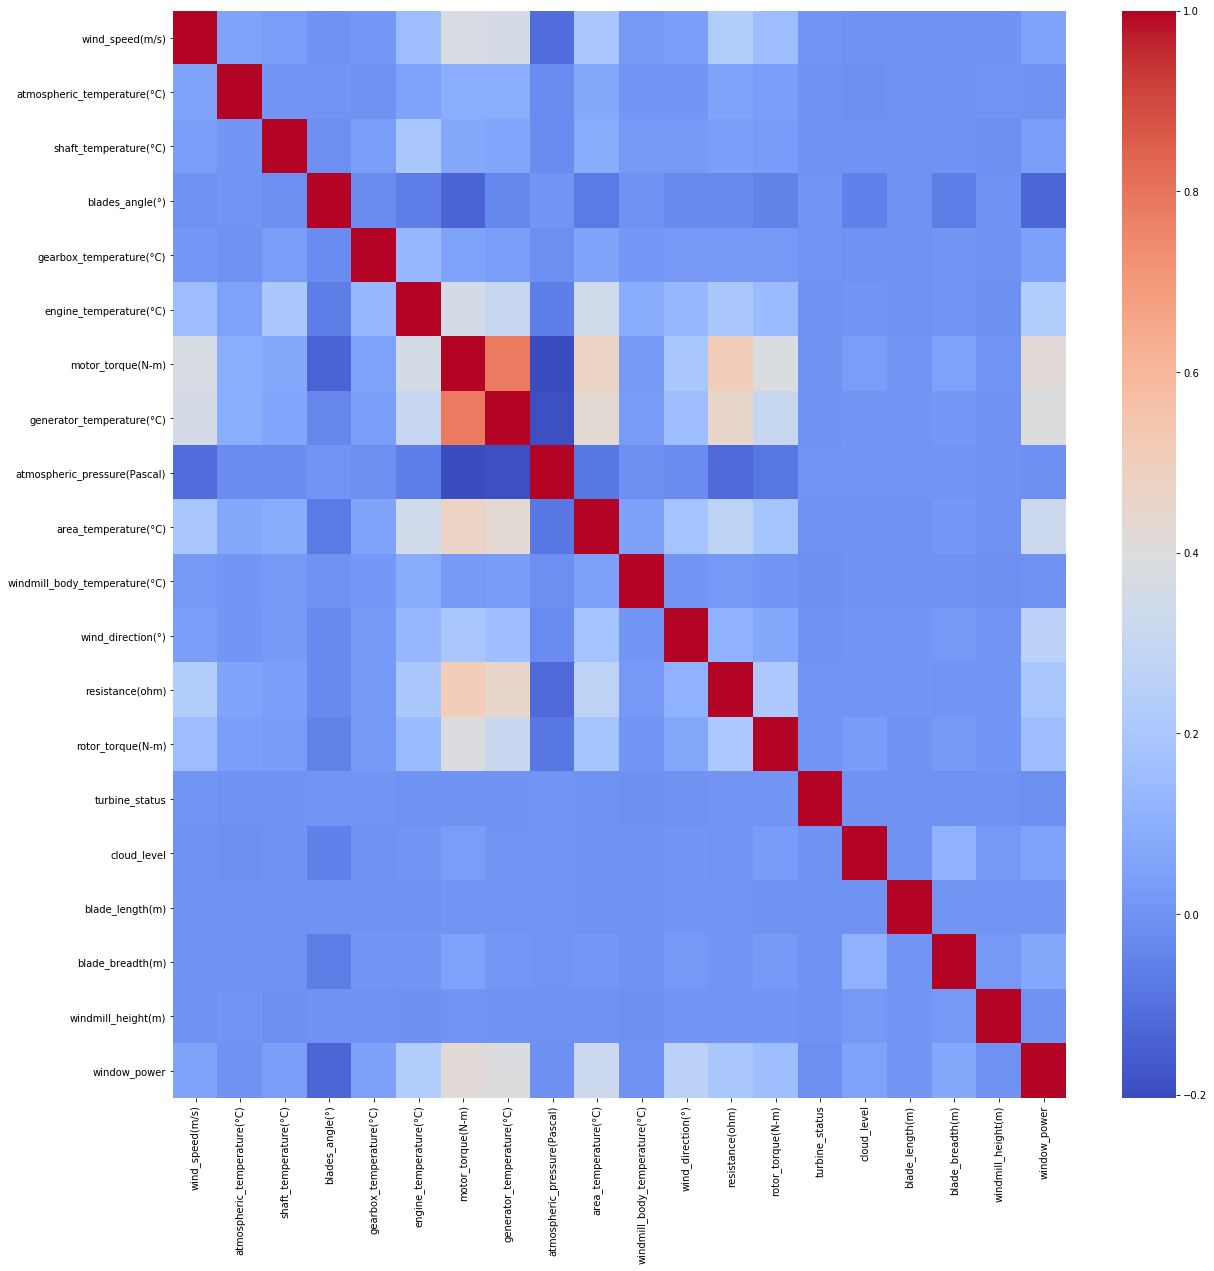

In [44]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap="coolwarm")

In [45]:
final1_df.drop(["generator_temperature(°C)"],axis=1,inplace=True)

In [46]:
final1_df.shape

(40286, 19)

In [47]:
tra_df=final1_df.iloc[:28200,:]
tes_df=final1_df.iloc[28200:,:]

In [48]:
tra_df.shape

(28200, 19)

In [50]:
tes_df.shape

(12086, 19)

In [57]:
tes_df.drop(["window_power"],axis=1,inplace=True)

E:\anaconda\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
tes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12086 entries, 0 to 12085
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                12086 non-null  float64
 1   atmospheric_temperature(°C)    12086 non-null  float64
 2   shaft_temperature(°C)          12086 non-null  float64
 3   blades_angle(°)                12086 non-null  float64
 4   gearbox_temperature(°C)        12086 non-null  float64
 5   engine_temperature(°C)         12086 non-null  float64
 6   motor_torque(N-m)              12086 non-null  float64
 7   atmospheric_pressure(Pascal)   12086 non-null  float64
 8   area_temperature(°C)           12086 non-null  float64
 9   windmill_body_temperature(°C)  12086 non-null  float64
 10  wind_direction(°)              12086 non-null  float64
 11  resistance(ohm)                12086 non-null  float64
 12  rotor_torque(N-m)              12086 non-null 

In [59]:
x1_train=tra_df.drop(["window_power"],axis=1)
y1_train=tra_df["window_power"]

In [60]:
from sklearn.ensemble import RandomForestRegressor
  

In [61]:
regressor=RandomForestRegressor(n_estimators=100,random_state=0)

In [62]:
regressor.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [63]:
y_prdict=regressor.predict(tes_df)

In [70]:
pred=pd.DataFrame(y_prdict)


In [71]:
pred

,0
0,2.590006
1,2.479282
2,3.489625
3,6.696295
4,3.477736
...,...
12081,6.624830
12082,3.300664
12083,5.292379
12084,5.450424


In [86]:
sub=pd.read_csv("sample_submission.csv")

In [87]:
sub.shape

(5, 3)

In [88]:
sub.head()

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,6.766521
1,WM_698,2018-11-05 10:13:20,5.966275
2,WM_39146,2019-09-14 14:03:20,2.874342
3,WM_6757,2018-12-25 15:33:20,14.851089
4,WM_21521,2019-05-04 03:13:20,3.519074


In [93]:
sub=sub.drop(["windmill_generated_power(kW/h)"],axis=1)

In [94]:
final_dataset=pd.concat([sub,pred],axis=1)

In [95]:
final_dataset.shape

(12086, 3)

In [96]:
final_dataset.head()

,tracking_id,datetime,0
0,WM_33725,2019-08-04 14:33:20,2.590006
1,WM_698,2018-11-05 10:13:20,2.479282
2,WM_39146,2019-09-14 14:03:20,3.489625
3,WM_6757,2018-12-25 15:33:20,6.696295
4,WM_21521,2019-05-04 03:13:20,3.477736


In [97]:
final_dataset.columns=["tracking_id","datetime","windpower(kw/h)"]

In [100]:
final_dataset.head()

,tracking_id,datetime,windpower(kw/h)
0,WM_33725,2019-08-04 14:33:20,2.590006
1,WM_698,2018-11-05 10:13:20,2.479282
2,WM_39146,2019-09-14 14:03:20,3.489625
3,WM_6757,2018-12-25 15:33:20,6.696295
4,WM_21521,2019-05-04 03:13:20,3.477736


In [102]:
final_dataset.tail()

,tracking_id,datetime,windpower(kw/h)
12081,NaN,NaN,6.624830
12082,NaN,NaN,3.300664
12083,NaN,NaN,5.292379
12084,NaN,NaN,5.450424
12085,NaN,NaN,10.532413


In [101]:
final_dataset.to_csv("sample_submission.csv",index=False)